
Build a CNN model using Tensorflow & Keras to train a classifier to predict the MINIST hand written digits. You are free to choose any architecture like AlexNet, VGG or any other.
Try Three different optimizers – 1) SGD, 2) ADAM, & 3) RMSProp
And finally compare these results. 

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


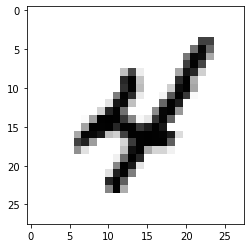

In [4]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

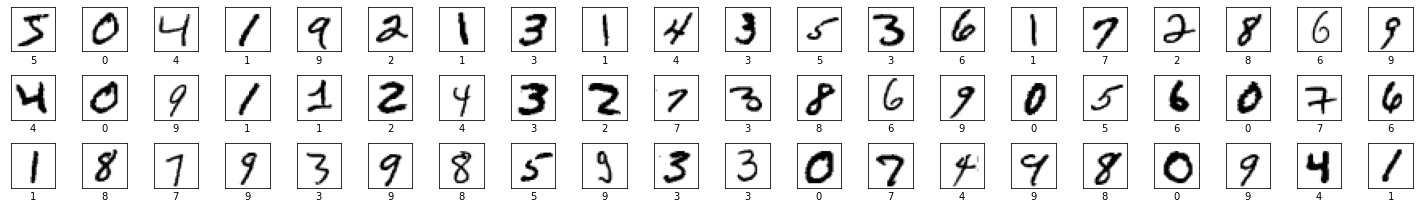

In [5]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [6]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

Image (#9): Which is digit '4'


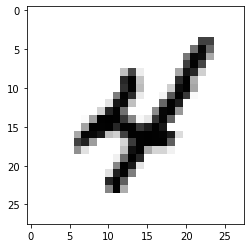

In [7]:
digit = 9 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [8]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
h = model.fit(x=x_train, y=y_train, epochs=8, batch_size=64, validation_split=0.3)


Epoch 1/8
657/657 [==============================] - 6s 7ms/step - loss: 0.2709 - accuracy: 0.9205 - val_loss: 0.1511 - val_accuracy: 0.9540
Epoch 2/8
657/657 [==============================] - 4s 6ms/step - loss: 0.1039 - accuracy: 0.9691 - val_loss: 0.1040 - val_accuracy: 0.9685
Epoch 3/8
657/657 [==============================] - 4s 6ms/step - loss: 0.0659 - accuracy: 0.9795 - val_loss: 0.1103 - val_accuracy: 0.9665
Epoch 4/8
657/657 [==============================] - 5s 8ms/step - loss: 0.0472 - accuracy: 0.9851 - val_loss: 0.1033 - val_accuracy: 0.9699
Epoch 5/8
657/657 [==============================] - 4s 7ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.1044 - val_accuracy: 0.9722
Epoch 6/8
657/657 [==============================] - 4s 7ms/step - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.1028 - val_accuracy: 0.9739
Epoch 7/8
657/657 [==============================] - 6s 9ms/step - loss: 0.0230 - accuracy: 0.9921 - val_loss: 0.1048 - val_accuracy: 0.9719
Epoch 8/8
657

In [12]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [13]:
h1 = model.fit(x=x_train, y=y_train, epochs=8, batch_size=64, validation_split=0.3)


Epoch 1/8
657/657 [==============================] - 3s 4ms/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.0923 - val_accuracy: 0.9778
Epoch 2/8
657/657 [==============================] - 3s 5ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.0910 - val_accuracy: 0.9781
Epoch 3/8
657/657 [==============================] - 4s 6ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0904 - val_accuracy: 0.9784
Epoch 4/8
657/657 [==============================] - 4s 6ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0902 - val_accuracy: 0.9784
Epoch 5/8
657/657 [==============================] - 3s 5ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0902 - val_accuracy: 0.9786
Epoch 6/8
657/657 [==============================] - 4s 6ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0902 - val_accuracy: 0.9786
Epoch 7/8
657/657 [==============================] - 3s 4ms/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0903 - val_accuracy: 0.9787
Epoch 8/8
657

In [16]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [17]:
h2 = model.fit(x=x_train, y=y_train, epochs=8, batch_size=64, validation_split=0.3)


Epoch 1/8
657/657 [==============================] - 7s 9ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.1274 - val_accuracy: 0.9738
Epoch 2/8
657/657 [==============================] - 7s 11ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.1267 - val_accuracy: 0.9764
Epoch 3/8
657/657 [==============================] - 6s 9ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.1300 - val_accuracy: 0.9775
Epoch 4/8
657/657 [==============================] - 6s 9ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.1441 - val_accuracy: 0.9754
Epoch 5/8
657/657 [==============================] - 6s 9ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1325 - val_accuracy: 0.9781
Epoch 6/8
657/657 [==============================] - 4s 6ms/step - loss: 4.0589e-04 - accuracy: 1.0000 - val_loss: 0.1460 - val_accuracy: 0.9777
Epoch 7/8
657/657 [==============================] - 4s 6ms/step - loss: 1.2109e-04 - accuracy: 1.0000 - val_loss: 0.1360 - val_accuracy: 0.9790
Epoc

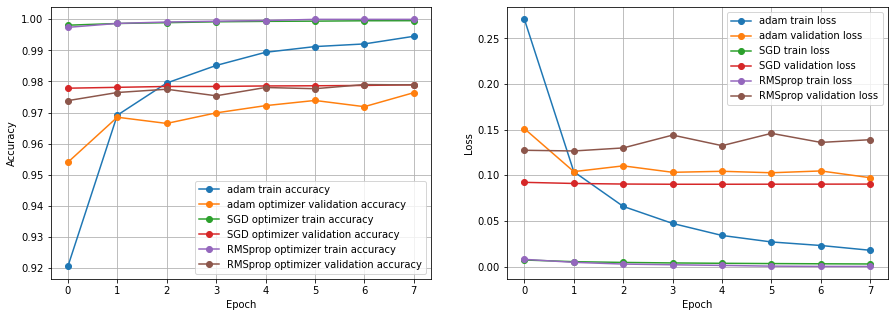

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='adam train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'adam optimizer validation accuracy')

plt.plot(h1.history['accuracy'], 'o-', label='SGD optimizer train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'SGD optimizer validation accuracy')

plt.plot(h2.history['accuracy'], 'o-', label='RMSprop optimizer train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'RMSprop optimizer validation accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='adam train loss')
plt.plot(h.history['val_loss'], 'o-', label='adam validation loss')

plt.plot(h1.history['loss'], 'o-', label='SGD train loss')
plt.plot(h1.history['val_loss'], 'o-', label='SGD validation loss')

plt.plot(h2.history['loss'], 'o-', label='RMSprop train loss')
plt.plot(h2.history['val_loss'], 'o-', label='RMSprop validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9832

Test accuracy: 0.9832000136375427


In [20]:
predictions = model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


4/4 [==============================] - 0s 2ms/step


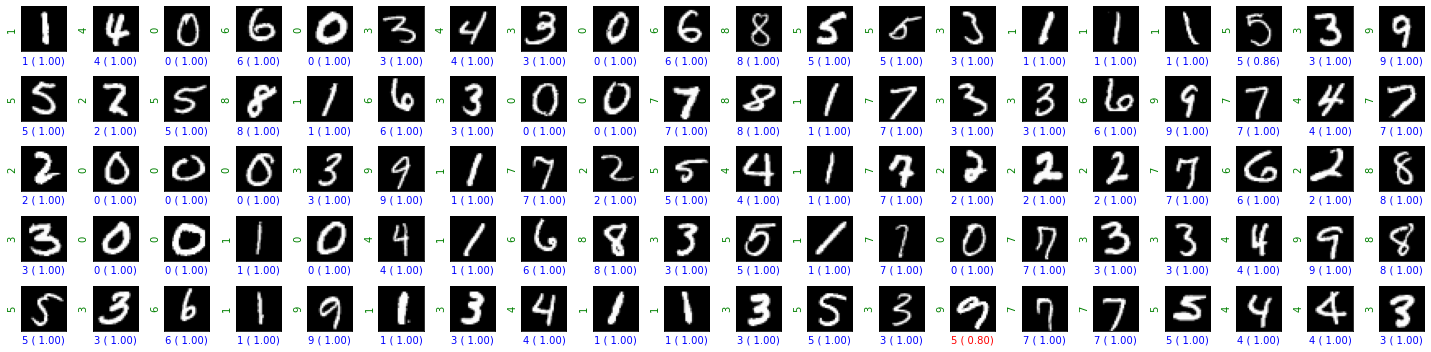

In [21]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [22]:
def test(i):
    img = x_test[i]
    predictions = model.predict([img.reshape(-1,784)])

    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel(f"True Label: {y_test[i]}", color='g') # ground truth

    prediction = np.argmax(predictions) 
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='b')
    else:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='r')
    plt.show()

1/1 [==============================] - 0s 72ms/step


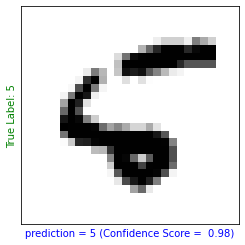

In [23]:
test(8)

1/1 [==============================] - 0s 21ms/step


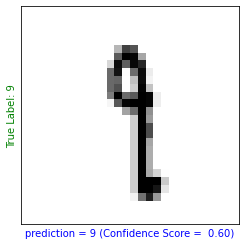

In [24]:
test(4500)

1/1 [==============================] - 0s 31ms/step


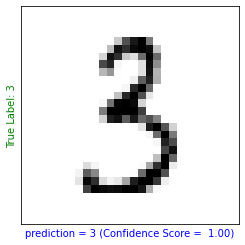

In [25]:
test(76)


1/1 [==============================] - 0s 21ms/step


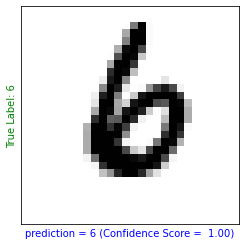

In [27]:
test(2156)


1/1 [==============================] - 0s 23ms/step


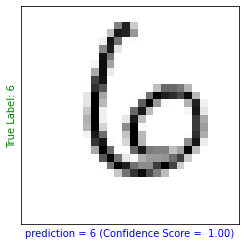

In [28]:
test(100)